In [82]:
import matplotlib
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import create_report
from dataprep.eda import *
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [83]:
# Explore the dataset
data, target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

#### We can use the "dataprep" library for the EDA of the dataset, this can be viewed seprately in a browser in the ipython file itself.
#### We will se both in this tutorial

In [84]:
# This will create a report of all the features
create_report(data).save()

  0%|          | 0/7043 [00:00<?, ?it/s]

c:\Users\agarw\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Report has been saved to c:\D_drive\Practise\ML\LinearModels\report.html!


#### We can also use this library to plot the graphs in section by section

In [85]:
# The code mentioned below can be used to plot specific req. All the EDA part is already taken care by the library.
# plot(data)
# plot_missing(data)
# plot_correlation(data)
# create_report(data)

#### Lets explore the terms in statistics for one of the feature generated by the library
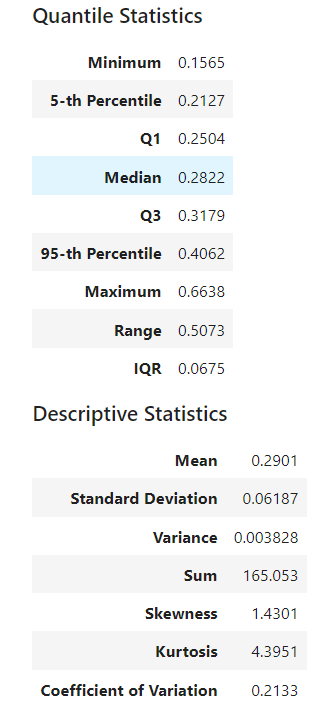

#### 1. Minimum : minimum value of the feature
#### 2. 5th percentile : Within a set of data, the n-th percentile describes the value below which n% of the data, when sorted, fall. For example, within the integer sequence spanning from 0 to 100, 50 is the 50th percentile or median, 10 is the 10th percentile, and 90 is the 90th percentile. For more detailed info please refer to https://ncss-tech.github.io/soil-range-in-characteristics/why-percentiles.html.
#### 3. Q1 : is 25th percentile
#### 4. Median or 50th percentile : Just the middle value of the data
#### 5. Q3 : 75th percentile of the data
#### 6. 95th percentile : Within a set of data, the n-th percentile describes the value below which n% of the data, when sorted, fall. For example, within the integer sequence spanning from 0 to 100, 50 is the 50th percentile or median, 10 is the 10th percentile, and 90 is the 90th percentile. For more detailed info please refer to https://ncss-tech.github.io/soil-range-in-characteristics/why-percentiles.html.
#### Maximum : Maximum value of the data. 
#### IQR(Inter Quartile Range) : To identify the outliers in the data, which is skewed in nature.It is defined as the difference between the 75th and 25th percentiles of the data. IQR = Q3 −  Q1 . The interquartile range (IQR) measures the spread of the middle half of your data. It is the range for the middle 50% of your sample.  Use the IQR to assess the variability where most of your values lie. Larger values indicate that the central portion of your data spread out further. Conversely, smaller values show that the middle values cluster more tightly.Typically, use the IQR with a measure of central tendency, such as the median, to understand your data’s center and spread.
 

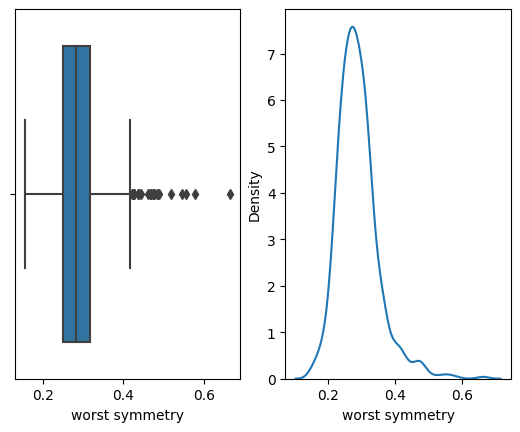

In [86]:
figure, axis = plt.subplots(ncols=2)
data["worst symmetry"]
sns.boxplot(x=data["worst symmetry"],ax=axis[0])
sns.kdeplot(x=data["worst symmetry"],ax=axis[1])

plt.show()

### From the above graph we can see that there are outliers in the feature on the right part only, we can remove this data if we want.
### Similarly we can do this for all other features.

### Lets start with the basic classification task, later we will try to get the best solution possible using SVM

In [87]:
print(f'Percentage of 1s out of total predictions is ',(sum(target == 1)/len(target)*100))
print(f'Percentage of 0s out of total predictions is ',(sum(target == 0)/len(target)*100))

Percentage of 1s out of total predictions is  62.741652021089635
Percentage of 0s out of total predictions is  37.258347978910365


In [88]:
# basic_pipe = Pipeline(steps=[
#             ('scaler', StandardScaler()),
#             ('estimator', SVC())
#             ])

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
grid_rf = GridSearchCV(estimator= SVC(),
                       param_grid = param_grid,
                       scoring= "accuracy",
                       cv=5)

In [104]:
X_train,X_test, y_train,y_test = train_test_split(data, target, test_size=0.25,random_state=42)
print("*-*"*25)
print(f'Original Train features shape',data.shape)
print(f'Original target shape',data.shape)
print("*-*"*25)
print(f'Train features shape',X_train.shape)
print(f'Train target shape',y_train.shape)
print(f'Test features shape',X_test.shape)
print(f'Test target shape',y_test.shape)
print("*-*"*25)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Original Train features shape (569, 30)
Original target shape (569, 30)
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Train features shape (426, 30)
Train target shape (426,)
Test features shape (143, 30)
Test target shape (143,)
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [105]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [106]:
print("Best parameter (CV score=%0.3f):" % grid_rf.best_score_)
print(grid_rf.best_params_)

Best parameter (CV score=0.965):
{'C': 10, 'kernel': 'linear'}


In [108]:
grid_predictions = grid_rf.predict(X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.98      0.97      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [111]:
print(confusion_matrix(y_test, grid_predictions))

[[52  2]
 [ 3 86]]
